In [74]:
#SLNN OR LR

In [75]:
#from sklearn.datasets import fetch_mldata(error)

In [76]:
from sklearn.datasets import fetch_openml #veriyi aldık.
dataset=fetch_openml("mnist_784") #28x28=784

In [77]:
type(dataset),type(dataset["data"]),type(dataset["target"])

(sklearn.utils.Bunch, numpy.ndarray, numpy.ndarray)

In [78]:
X,y=dataset["data"],dataset["target"]

In [79]:
X=X/255.0 #broadcasting normalize (data'yı sıfır-bir aralığına çekti.)

In [80]:
X.shape #70000 tane resim var ve her bir satırda 1 resim var.

(70000, 784)

In [81]:
len(X[1,:])

784

In [82]:
#X[1,:]

In [83]:
y.shape #her bir satırda bir tane data var, data'nın kendisi.

(70000,)

In [84]:
img_1=X[1,:].reshape(28,28) #X'in birinci sütununu al. 1.sütunda 784 tane sütun var.
#Bunu 28'e 28'lik bir iki boyutlu yapı haline dönüştür.

In [85]:
#img_1

In [86]:
import matplotlib.pyplot as plt

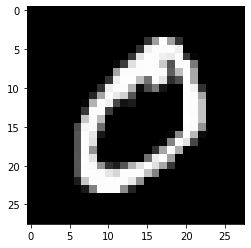

In [87]:
plt.imshow(img_1,cmap='gray')
plt.show()

In [88]:
y[1] #demek ki birinci resim sıfırmış. y'de de karşılık sıfır.

'0'

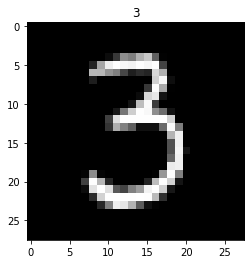

In [89]:
i=50
img_1=X[i,:].reshape(28,28) 
plt.imshow(img_1,cmap='gray')
plt.title(y[i])
plt.show()

In [90]:
import numpy as np

y_new = np.zeros(y.shape)
y_new[np.where(y == 0.0)[0]] = 1
y = y_new#dolayısıyla artık y içerisinde sadece 0 ve 1'ler olacak. (başka rakamlar olmayacak.)

In [91]:
#y_new

In [92]:
m = 60000 #60000 tane değeri train için kullanıyoruz bu aşamada.
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
y_train, y_test = y[:m].reshape(1,m), y[m:].reshape(1,m_test)

In [93]:
np.random.seed(138)
shuffle_index = np.random.permutation(m)
X_train, y_train = X_train[:,shuffle_index], y_train[:,shuffle_index]

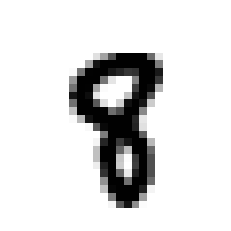

[0.]


In [94]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

i = 3
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[:,i])
#8-->sıfır değil yani sıfır dönecek.

In [95]:
epsilon=1e-5
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [96]:
def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat+epsilon),Y) ) + np.sum( np.multiply(np.log(1-Y_hat+epsilon),(1-Y)) ) )
    #ortalama hata

    return L

In [97]:
learning_rate = 1

X = X_train
Y = y_train

n_x = X.shape[0]
m = X.shape[1]

W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1, 1))

for i in range(2000):
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z)

    cost = compute_loss(Y, A)

    dW = (1/m) * np.matmul(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y, axis=1, keepdims=True)

    W = W - learning_rate * dW
    b = b - learning_rate * db

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  0.6780211644256914
Epoch 100 cost:  7.076902320959293e-06
Epoch 200 cost:  6.788042310395341e-06
Epoch 300 cost:  6.509536669410529e-06
Epoch 400 cost:  6.2408235413021496e-06
Epoch 500 cost:  5.981381523350102e-06
Epoch 600 cost:  5.7307260634873855e-06
Epoch 700 cost:  5.4884062371698304e-06
Epoch 800 cost:  5.25400185830499e-06
Epoch 900 cost:  5.027120884411449e-06
Epoch 1000 cost:  4.80739708150846e-06
Epoch 1100 cost:  4.594487918813512e-06
Epoch 1200 cost:  4.388072667200974e-06
Epoch 1300 cost:  4.187850678699896e-06
Epoch 1400 cost:  3.993539827179665e-06
Epoch 1500 cost:  3.804875092808119e-06
Epoch 1600 cost:  3.6216072750061202e-06
Epoch 1700 cost:  3.443501820447784e-06
Epoch 1800 cost:  3.270337754241947e-06
Epoch 1900 cost:  3.101906703817453e-06
Final cost: 2.939629116885374e-06


In [98]:
y_test.ndim,y_test.shape

(2, (1, 10000))

In [99]:
y_test[0,100]

0.0

In [100]:
y_test[0,100]=1.0 #hata bulması için değeri değiştirdik bir tanesini 1 yaptık.

In [101]:
y_test[0,100]

1.0

In [102]:
from sklearn.metrics import classification_report, confusion_matrix

Z = np.matmul(W.T, X_test) + b
A = sigmoid(Z)

predictions = (A>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels))

[[9999    1]
 [   0    0]]


In [103]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10000
        True       0.00      0.00      0.00         0

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000

